# Задание 1

## A). Использовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила.

Для начала используем DecisionTreeClassifier

Импортируем датасет и pandas

In [1]:
import pandas as pd

In [2]:
df_class = pd.read_csv('weatherAUS.csv')

Посмотрим на датасет

In [3]:
df_class.head (10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Просмотрим общую информацию о датасете

In [4]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Обработаем пропущенные значения

In [5]:
missing_values = df_class.isnull().sum()
missing_values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Заполняем пропущенные значения в зависимости от типа данных
- если инт заполняем медианной
- если флоат средним арифметическим
- в другом случае модой

In [6]:
for column in df_class.columns:
    if df_class[column].dtype == 'int64':
        df_class[column] = df_class[column].fillna(df_class[column].median())
    elif df_class[column].dtype == 'float64':
        df_class[column] = df_class[column].fillna(df_class[column].mean())
    else:
        df_class[column] = df_class[column].fillna(df_class[column].mode()[0])

In [7]:
missing_values = df_class.isnull().sum()
missing_values

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Поменяем наименования столбиков

In [8]:
df_class.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df_class = df_class.rename (
    columns = {
        'Date' : 'date',
        'Location' : 'location',
        'MinTemp' : 'min_temp',
        'MaxTemp' : 'max_temp',
        'Rainfall' : 'rainfall',
        'Evaporation' : 'evaporation',
        'Sunshine' : 'sunshine',
        'WindGustDir' : 'wind_gust_dir',
        'WindGustSpeed' : 'wind_gust_speed',
        'WindDir9am' : 'wind_dir_9am',
        'WindDir3pm' : 'wind_dir_3pm',
        'WindSpeed9am' : 'wind_speed_9am',
        'WindSpeed3pm' : 'wind_speed_3pm',
        'Humidity9am' : 'humidity_9am',
        'Humidity3pm' : 'humidity_3pm',
        'Pressure9am' : 'pressure_9am',
        'Pressure3pm' : 'pressure_3pm',
        'Cloud9am' : 'cloud_9am',
        'Cloud3pm' : 'cloud_3pm',
        'Temp9am' : 'temp_9am',
        'Temp3pm' : 'temp_3pm',
        'RainToday' : 'rain_today',
        'RainTomorrow' : 'rain_tomorrow'
    }
)

In [10]:
df_class.columns

Index(['date', 'location', 'min_temp', 'max_temp', 'rainfall', 'evaporation',
       'sunshine', 'wind_gust_dir', 'wind_gust_speed', 'wind_dir_9am',
       'wind_dir_3pm', 'wind_speed_9am', 'wind_speed_3pm', 'humidity_9am',
       'humidity_3pm', 'pressure_9am', 'pressure_3pm', 'cloud_9am',
       'cloud_3pm', 'temp_9am', 'temp_3pm', 'rain_today', 'rain_tomorrow'],
      dtype='object')

Уберём данный столбик, так как он не играет роли в классификиции и может испортить её

In [11]:
df_class = df_class.drop(['date'], axis=1)

In [12]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         145460 non-null  object 
 1   min_temp         145460 non-null  float64
 2   max_temp         145460 non-null  float64
 3   rainfall         145460 non-null  float64
 4   evaporation      145460 non-null  float64
 5   sunshine         145460 non-null  float64
 6   wind_gust_dir    145460 non-null  object 
 7   wind_gust_speed  145460 non-null  float64
 8   wind_dir_9am     145460 non-null  object 
 9   wind_dir_3pm     145460 non-null  object 
 10  wind_speed_9am   145460 non-null  float64
 11  wind_speed_3pm   145460 non-null  float64
 12  humidity_9am     145460 non-null  float64
 13  humidity_3pm     145460 non-null  float64
 14  pressure_9am     145460 non-null  float64
 15  pressure_3pm     145460 non-null  float64
 16  cloud_9am        145460 non-null  floa

In [13]:
df_class.duplicated().sum()

np.int64(217)

In [14]:
df_class = df_class.drop_duplicates().reset_index(drop=True)

In [15]:
df_class.duplicated().sum()

np.int64(0)

 преобразуем категориальные столбцы в числовые коды

In [18]:
df_class['location'] = pd.Categorical(df_class['location']).codes
df_class['wind_gust_dir'] = pd.Categorical(df_class['wind_gust_dir']).codes
df_class['wind_dir_9am'] = pd.Categorical(df_class['wind_dir_9am']).codes
df_class['wind_dir_3pm'] = pd.Categorical(df_class['wind_dir_3pm']).codes
df_class['rain_today'] = pd.Categorical(df_class['rain_today']).codes
df_class['rain_tomorrow'] = pd.Categorical(df_class['rain_tomorrow']).codes
df_class

,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,wind_dir_3pm,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145238,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145239,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145240,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145241,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


In [19]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145243 entries, 0 to 145242
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         145243 non-null  int8   
 1   min_temp         145243 non-null  float64
 2   max_temp         145243 non-null  float64
 3   rainfall         145243 non-null  float64
 4   evaporation      145243 non-null  float64
 5   sunshine         145243 non-null  float64
 6   wind_gust_dir    145243 non-null  int8   
 7   wind_gust_speed  145243 non-null  float64
 8   wind_dir_9am     145243 non-null  int8   
 9   wind_dir_3pm     145243 non-null  int8   
 10  wind_speed_9am   145243 non-null  float64
 11  wind_speed_3pm   145243 non-null  float64
 12  humidity_9am     145243 non-null  float64
 13  humidity_3pm     145243 non-null  float64
 14  pressure_9am     145243 non-null  float64
 15  pressure_3pm     145243 non-null  float64
 16  cloud_9am        145243 non-null  floa

Для древовидных моделей нет необходимости масштабировать признаки! (Метрики расстояния не используются)

In [20]:
#Выделим признаки и целевую переменную
X = df_class.drop(['rain_tomorrow'], axis=1)
y = df_class['rain_tomorrow']

In [21]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size = 0.2, random_state = 42)

Импортируем DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
Tree_classifier = DecisionTreeClassifier(max_depth = 3) #Создание классификатора дерева решений с 3 уровнями
Tree_classifier.fit(X_train_class, y_train_class) #обучение модели 

DecisionTreeClassifier(max_depth=3)

Посмотрим парраметры которые были использованы
- criterion: Критерий для оценки качества расщепления узлов. Возможные значения: 'gini' (по умолчанию) или 'entropy'.
- splitter: Стратегия выбора расщепления. Возможные значения: 'best' (по умолчанию) или 'random'.
- max_depth: Максимальная глубина дерева (задана как 3 ).
- min_samples_split: Минимальное количество образцов, необходимых для разделения узла (по умолчанию 2).
- min_samples_leaf: Минимальное количество образцов в листовом узле (по умолчанию 1).
- min_weight_fraction_leaf: Минимальная взвешенная доля образцов в листе.
- max_features: Максимальное количество признаков для рассмотрения при расщеплении (по умолчанию None, то есть все признаки).
- random_state: Контроль за случайностью (по умолчанию None).
- max_leaf_nodes: Максимальное количество листовых узлов (по умолчанию None, то есть без ограничения).
- ccp_alpha: Параметр минимальной сложности для постобрезки дерева (по умолчанию 0.0).

In [24]:
Tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Посмотрим глубину дерева

In [25]:
Tree_classifier.get_depth()

3

In [26]:
from sklearn.metrics import accuracy_score

 смотрим предсказание меток классов для данных тестовой выборки с помощью обученного классификатора дерева решений

In [28]:
y_pred_class = Tree_classifier.predict(X_test_class)

рассчитываем метрику точности модели 

In [29]:
accuracy_score(y_test_class, y_pred_class)

0.8288409239560742

ПРоверим переобучеенность модели

In [30]:
print(Tree_classifier.score(X_train_class, y_train_class))
print(Tree_classifier.score(X_test_class, y_test_class))

0.830189166394134
0.8288409239560742


Значения сопоставими, признаков переобучения нет

In [31]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22652
           1       0.74      0.34      0.47      6397

    accuracy                           0.83     29049
   macro avg       0.79      0.65      0.68     29049
weighted avg       0.82      0.83      0.80     29049



Теперь давайте попробуем оценить точность нашей модели, используя технику перекрестной проверки.

In [33]:
from sklearn.model_selection import cross_val_score

разделяем данные на обучающие и тестовые подмножества в рамках заданного количества разбиений (5), Для каждой итерации обучает модель на обучающей части и оценивает метрику точность на тестовой.

In [34]:
accuracy = cross_val_score(estimator = Tree_classifier, X = X_train_class, y = y_train_class, cv = 5 , scoring="accuracy" )
round(accuracy.mean(),3)

np.float64(0.83)

Оптимизация гиперпараметров с GridSearchCV

In [35]:
Tree_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
Tree_best_grid = GridSearchCV(Tree_classifier,
                              Tree_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train_class, y_train_class)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [35]:
# Лучшие значения гиперпараметров:
Tree_best_grid.best_params_

{'max_depth': 7, 'min_samples_split': 2}

In [36]:
# Best score:
Tree_best_grid.best_score_

0.8413343098458756

Визуализация DTs

In [65]:
import matplotlib.pyplot as plt

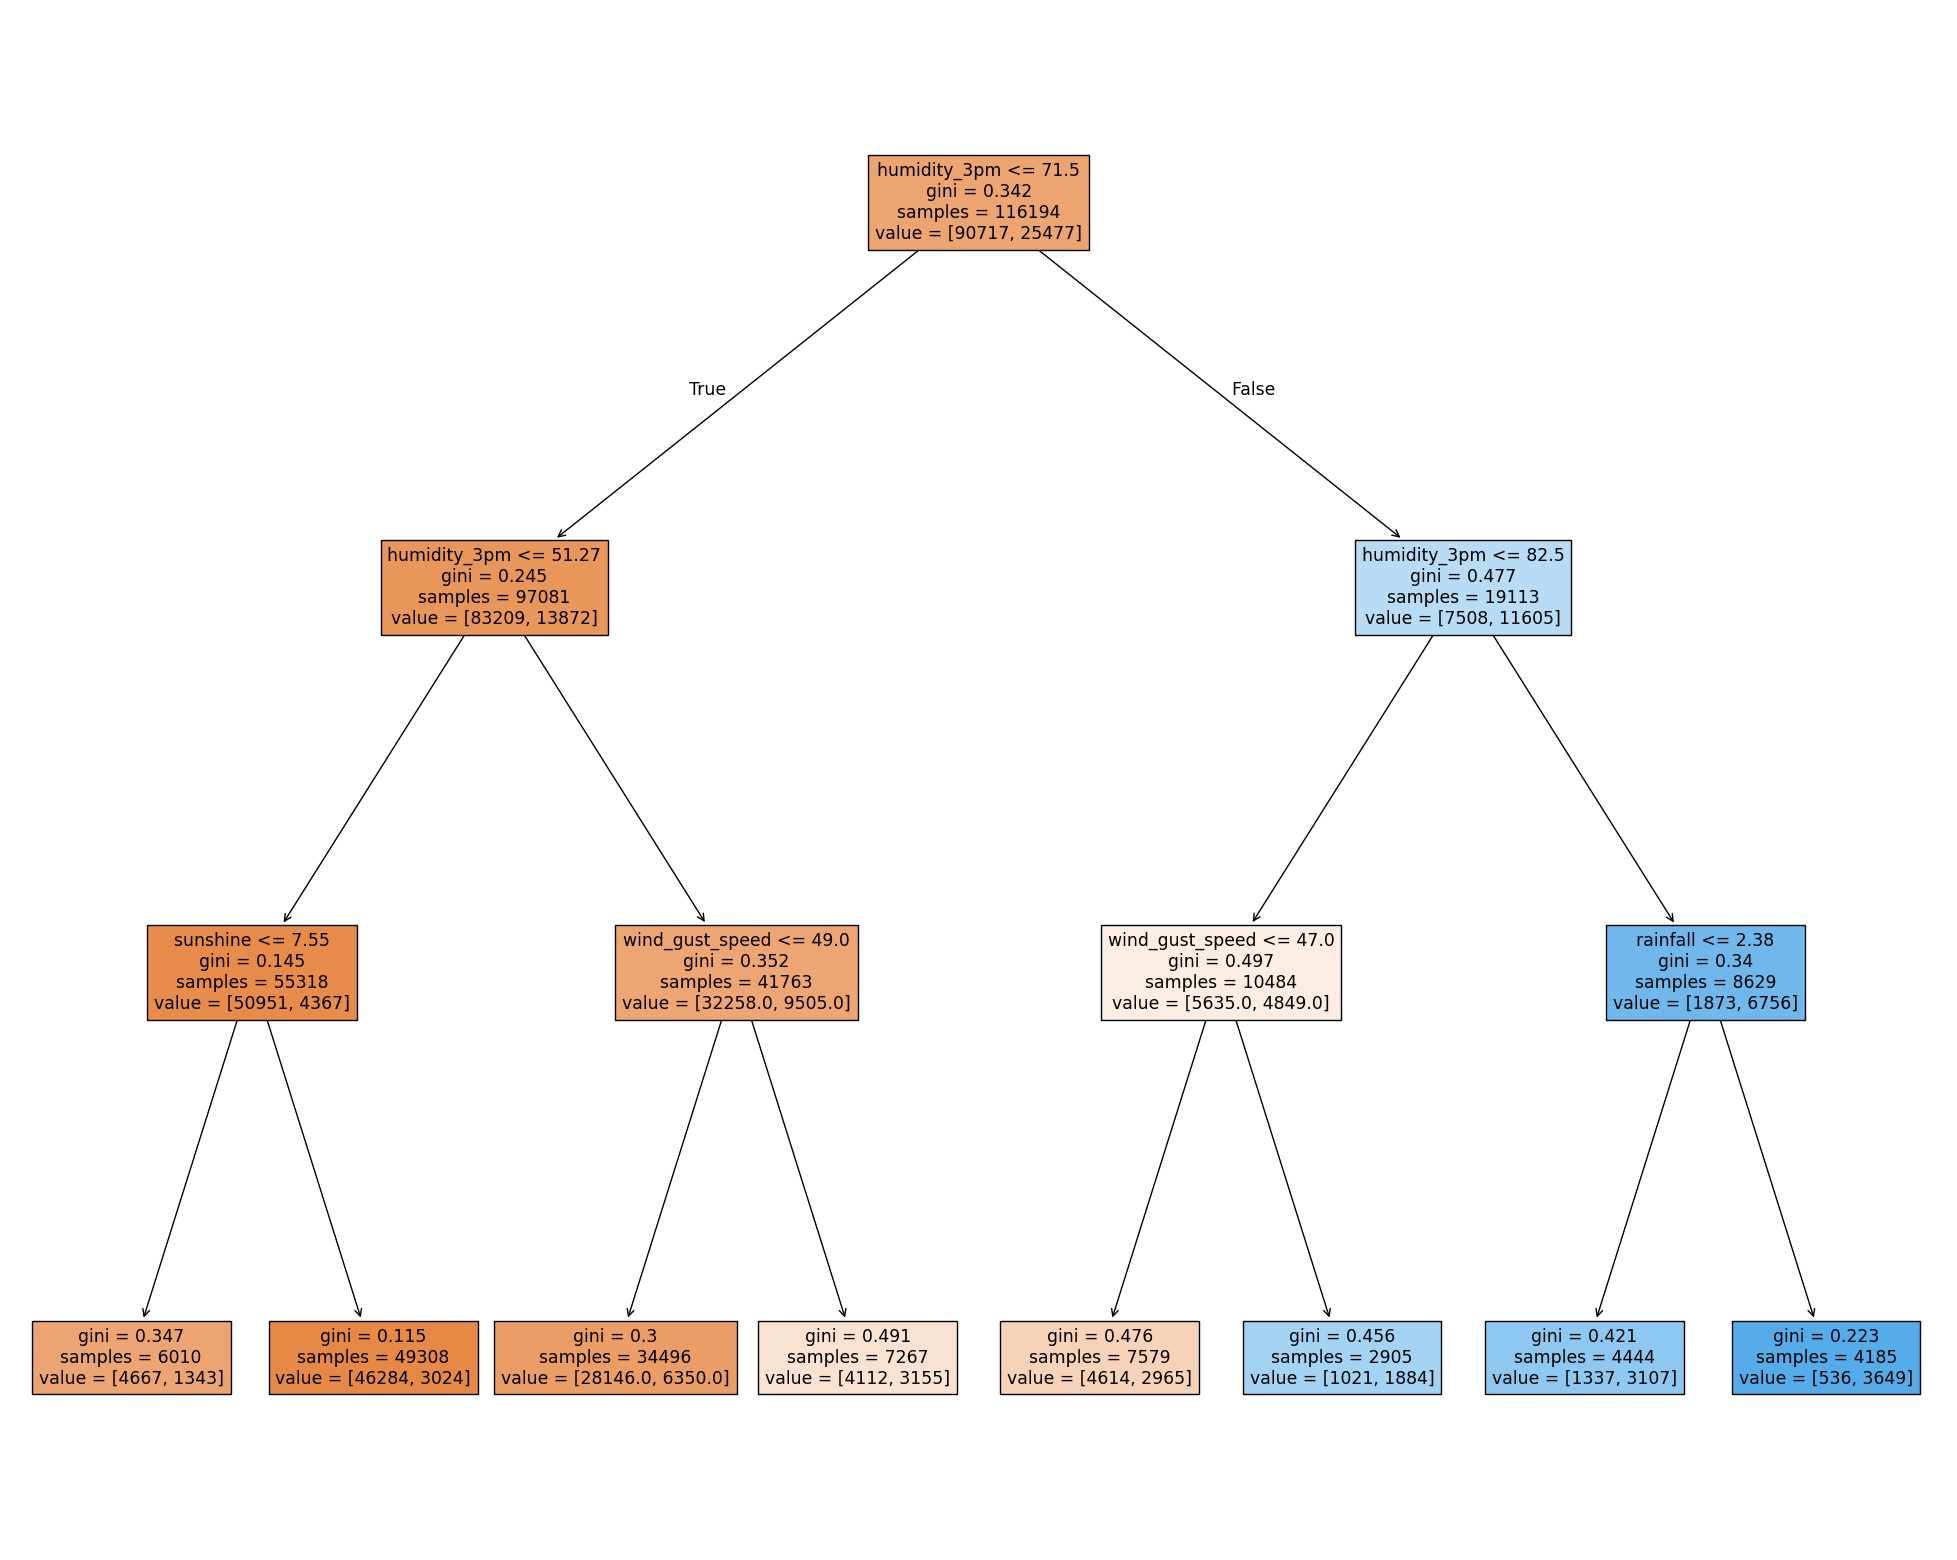

In [66]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_classifier, feature_names=X_test_class.columns.tolist(), filled=True)

Извлечение решающих правил

In [67]:
from sklearn.tree import export_text

In [68]:
tree_rules = export_text(Tree_classifier, feature_names=list(X_train_class.columns))
print(tree_rules)

|--- humidity_3pm <= 71.50
|   |--- humidity_3pm <= 51.27
|   |   |--- sunshine <= 7.55
|   |   |   |--- class: 0
|   |   |--- sunshine >  7.55
|   |   |   |--- class: 0
|   |--- humidity_3pm >  51.27
|   |   |--- wind_gust_speed <= 49.00
|   |   |   |--- class: 0
|   |   |--- wind_gust_speed >  49.00
|   |   |   |--- class: 0
|--- humidity_3pm >  71.50
|   |--- humidity_3pm <= 82.50
|   |   |--- wind_gust_speed <= 47.00
|   |   |   |--- class: 0
|   |   |--- wind_gust_speed >  47.00
|   |   |   |--- class: 1
|   |--- humidity_3pm >  82.50
|   |   |--- rainfall <= 2.38
|   |   |   |--- class: 1
|   |   |--- rainfall >  2.38
|   |   |   |--- class: 1



Теперь используем DecisionTreeRegressor

In [69]:
df_reg = pd.read_csv('diamonds.csv')

Посмотрим на датасет

In [70]:
df_reg.head (10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Просмотрим общую информацию о датасете

In [71]:
del df_reg['Unnamed: 0']

In [72]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [73]:
df_reg.duplicated().sum()

np.int64(146)

In [74]:
df_reg = df_reg.drop_duplicates().reset_index(drop=True)

In [75]:
df_reg.duplicated().sum()

np.int64(0)

преобразуем категориальные данные в числовые значения

In [76]:
dict_cut = {'Ideal': 5,
            'Premium': 4,
            'Very Good': 3,
            'Good': 2,
            'Fair': 1}

df_reg['cut'] = df_reg['cut'].map(dict_cut)

dict_color = {'D': 7,
              'E': 6,
              'F': 5,
              'G': 4,
              'H': 3,
              'I': 2,
              'J': 1}

df_reg['color'] = df_reg['color'].map(dict_color)

dict_clarity = {'IF': 8,
              'VVS1': 7,
              'VVS2': 6,
              'VS1': 5,
              'VS2': 4,
              'SI1': 3,
              'SI2': 2,
              'I1': 1}

df_reg['clarity'] = df_reg['clarity'].map(dict_clarity)

In [77]:
df_reg.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


In [78]:
y_reg = df_reg["price"] #Целевая переменная
X_reg = df_reg.drop(["price"], axis=1) #Набор признаков 

In [79]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2)

In [80]:
from sklearn.tree import DecisionTreeRegressor

выполняем настройку и обучение регрессионного дерева решений с использованием данных для обучения, макс глубина так же 3

In [81]:
Tree_regressor = DecisionTreeRegressor(max_depth = 3)
Tree_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3)

In [82]:
Tree_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [83]:
Tree_regressor.get_depth()

3

In [84]:
y_hat_reg = Tree_regressor.predict(X_test_reg)

In [85]:
import seaborn as sns

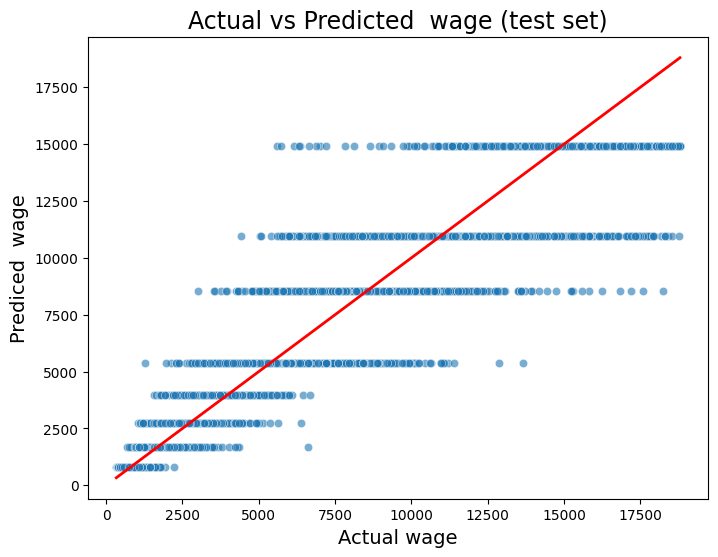

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_hat_reg, alpha=0.6)
sns.lineplot(x=y_test_reg, y=y_test_reg, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [88]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_hat_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_hat_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_hat_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_hat_reg))}')
print(f'R^2: {Tree_regressor.score(X_test_reg, y_test_reg)}')

MAE: 771.1777578509866
MSE: 1753373.136595838
RMSE: 1324.1499675625257
MAPE: 0.4726845648634517
R^2: 0.889729327510622


In [89]:
Tree_best_grid = GridSearchCV(Tree_regressor,
                              Tree_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [90]:
# Лучшие значения гиперпараметров:
Tree_best_grid.best_params_

{'max_depth': 10, 'min_samples_split': 15}

In [91]:
# Best score:
Tree_best_grid.best_score_

np.float64(0.974251726539243)

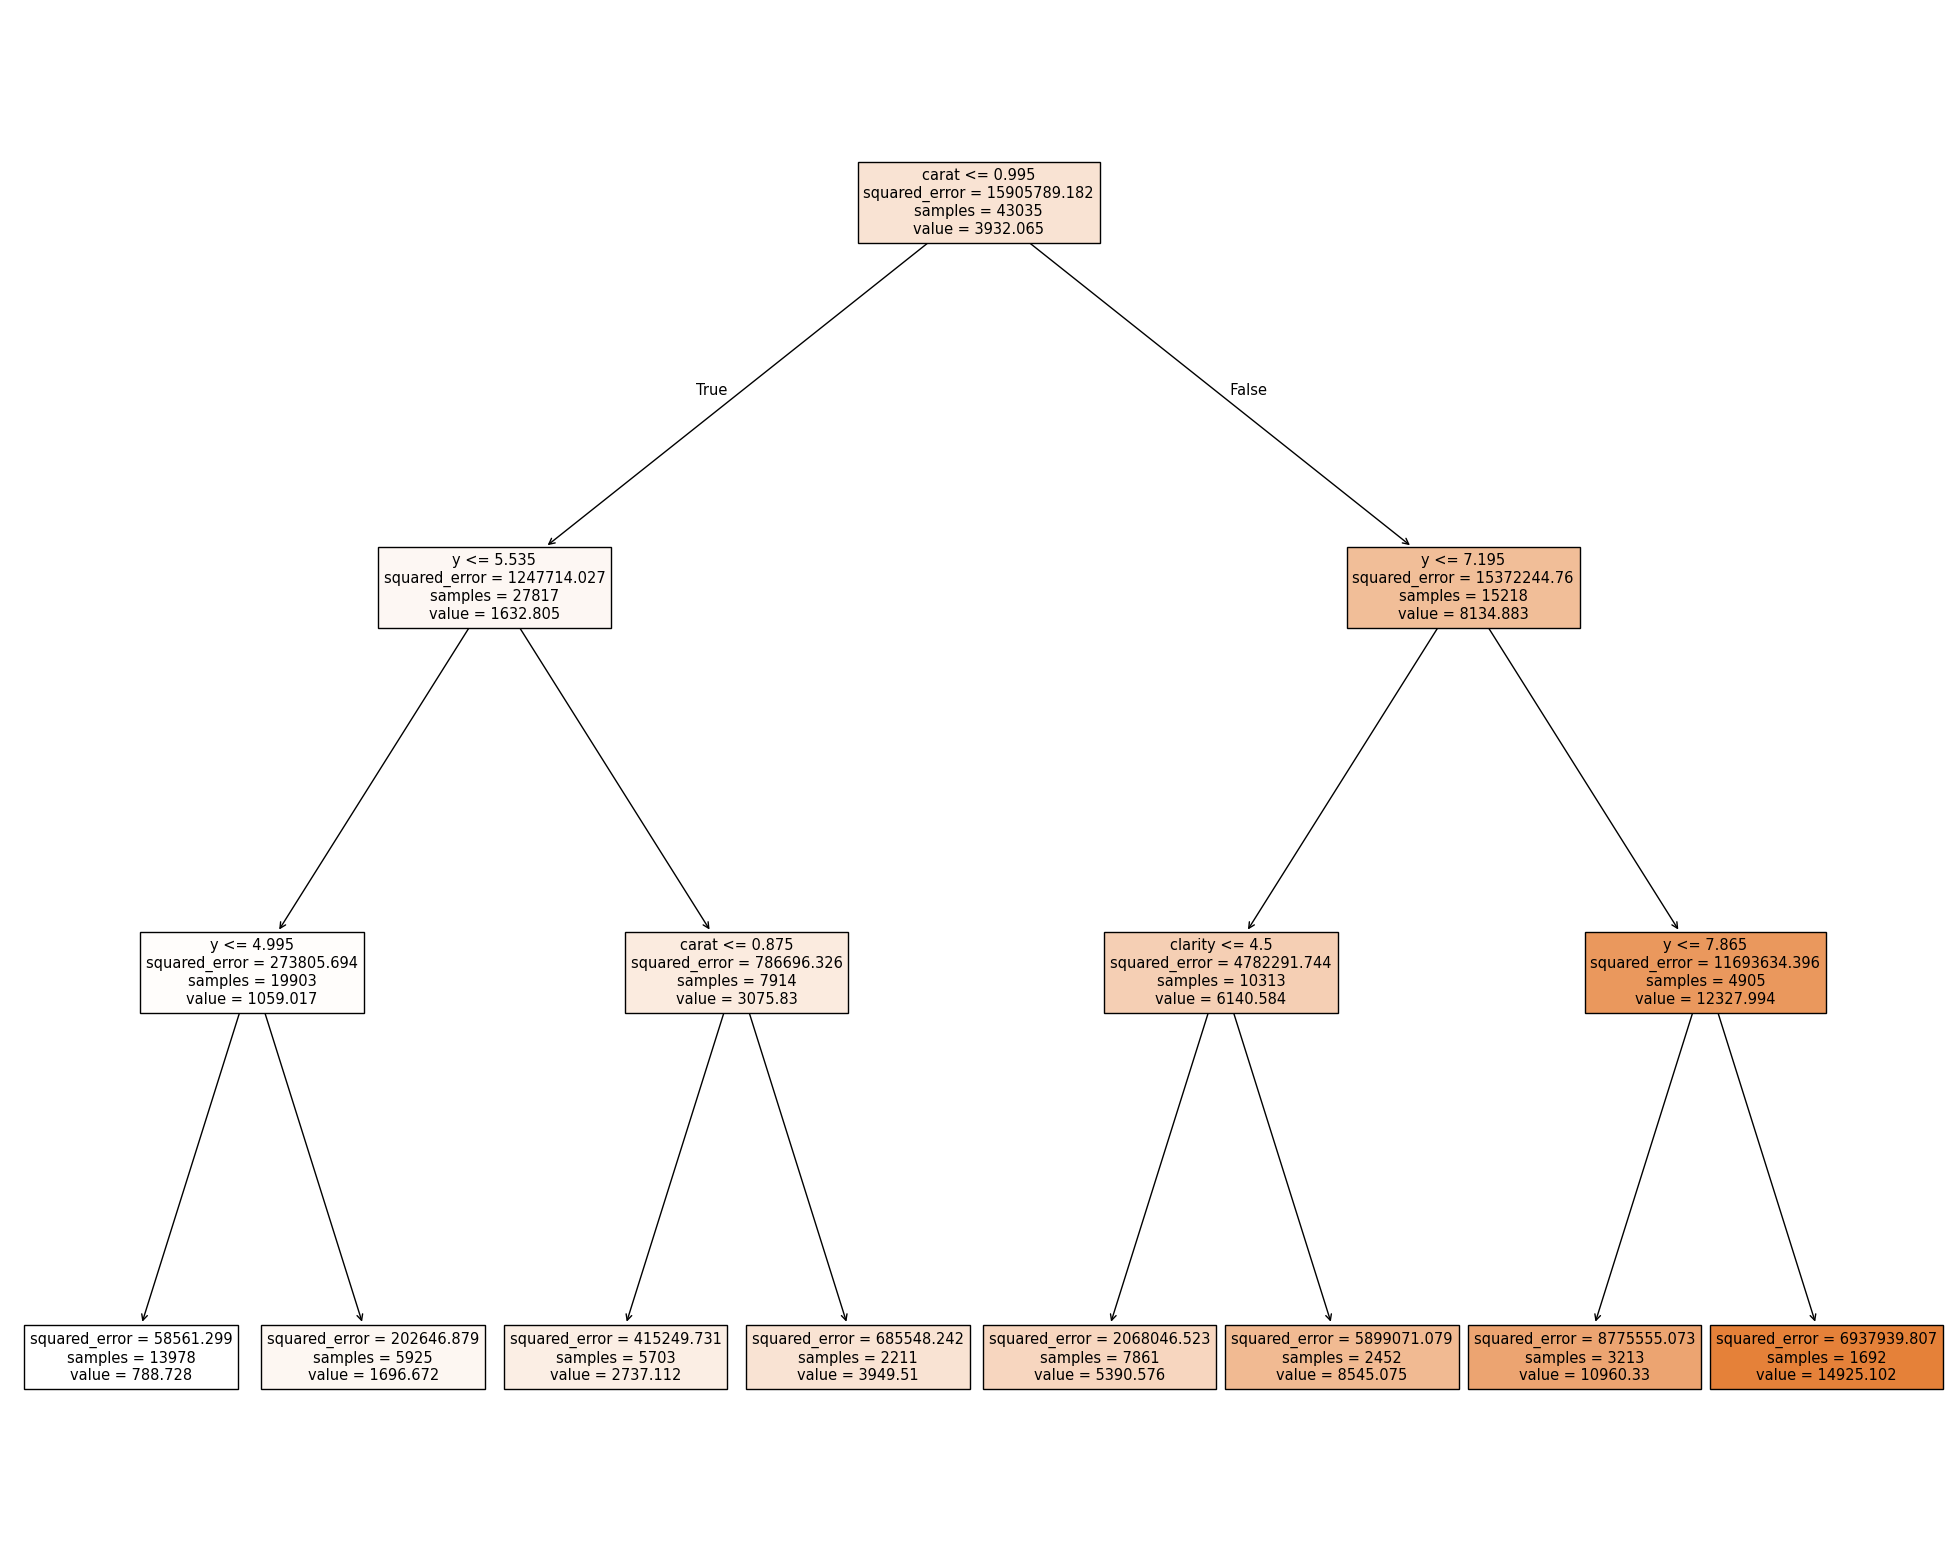

In [92]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree_regressor, feature_names=X_test_reg.columns.tolist(), filled=True)

In [65]:
text_representation = tree.export_text(Tree_regressor)
print(text_representation)

|--- feature_0 <= 1.00
|   |--- feature_0 <= 0.61
|   |   |--- feature_6 <= 4.97
|   |   |   |--- value: [785.06]
|   |   |--- feature_6 >  4.97
|   |   |   |--- value: [1669.41]
|   |--- feature_0 >  0.61
|   |   |--- feature_0 <= 0.87
|   |   |   |--- value: [2681.80]
|   |   |--- feature_0 >  0.87
|   |   |   |--- value: [3936.73]
|--- feature_0 >  1.00
|   |--- feature_7 <= 7.19
|   |   |--- feature_3 <= 4.50
|   |   |   |--- value: [5397.15]
|   |   |--- feature_3 >  4.50
|   |   |   |--- value: [8511.35]
|   |--- feature_7 >  7.19
|   |   |--- feature_7 <= 7.91
|   |   |   |--- value: [10970.75]
|   |   |--- feature_7 >  7.91
|   |   |   |--- value: [15042.42]



## Б). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

In [66]:
import numpy as np

In [67]:
class CART:
    #метод инициализации класса CART. 
    #Он принимает необязательные параметры max_depth (максимальная глубина дерева), 
    #min_samples_split (минимальное количество образцов для разделения узла) и 
    #classification (логическое значение, указывающее, будет ли модель классификацией или регрессией)
    def __init__(self, max_depth=None, min_samples_split=2, classification=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classification = classification

    #Вложенный класс используется для представления узла в дереве решений. 
    #Узел имеет атрибуты feature (признак для разделения), 
    #threshold (пороговое значение для разделения),
    #value (предсказанное значение или класс в узле), 
    #left (левый дочерний узел) и 
    #right (правый дочерний узел)
    class Node:
        def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
            self.feature = feature
            self.threshold = threshold
            self.value = value
            self.left = left
            self.right = right

    #Метод для разделения набора данных на две части на основе определенного признака и порогового значения. 
    #Он принимает массивы X и y, признак, по которому выполняется разделение, и пороговое значение. 
    #Возвращает разделенные подмножества X_left, y_left, X_right и y_right
    def split_dataset(self, X, y, feature, threshold):
        left_indices = np.where(X[:, feature] <= threshold)[0]
        right_indices = np.where(X[:, feature] > threshold)[0]
        return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

    #Метод для вычисления энтропии набора данных y. 
    #Он использует счетчик по классам, чтобы определить частоту каждого класса и вычислить энтропию с использованием формулы Шеннона. 
    #Возвращает значение энтропии
    def entropy(self, y):
        class_counts = Counter(y)
        probabilities = np.array(list(class_counts.values())) / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    #Метод для вычисления среднеквадратичной ошибки набора данных y. 
    #Он вычисляет среднее значение и сумму квадратов отклонений от среднего для определения среднеквадратичной ошибки. 
    #Возвращает значение среднеквадратичной ошибки
    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    #Метод для нахождения наилучшего разделения в наборе данных X и y. 
    #Он перебирает все признаки и пороговые значения, чтобы найти комбинацию, которая минимизирует метрику качества разделения. 
    #Возвращает наилучший признак, пороговое значение и метрику качества разделения.
    def find_best_split(self, X, y):
        best_feature, best_threshold, best_score = None, None, float('inf')
        n_features = X.shape[1]
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                if self.classification:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.entropy(y_left) + len(y_right) * self.entropy(y_right)
                else:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.mean_squared_error(y_left) + len(y_right) * self.mean_squared_error(y_right)
                if score < best_score:
                    best_feature, best_threshold, best_score = feature, threshold, score
        return best_feature, best_threshold

    #Метод для определения наиболее часто встречающегося класса в наборе данных y. 
    #Он использует счетчик по классам, чтобы определить частоту каждого класса и возвратить класс с наибольшей частотой
    def majority_vote(self, y):
        class_counts = Counter(y)
        return class_counts.most_common(1)[0][0]

    #Метод для построения дерева решений. 
    #Он рекурсивно строит дерево, выбирая наилучшие разделения на каждом узле, пока не достигнет 
    #максимальной глубины или минимального количества образцов для разделения. Возвращает корень дерева
    def build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(X) < self.min_samples_split:
            if self.classification:
                return self.Node(value=self.majority_vote(y))
            else:
                return self.Node(value=np.mean(y))

        feature, threshold = self.find_best_split(X, y)
        X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
        left_child = self.build_tree(X_left, y_left, depth + 1)
        right_child = self.build_tree(X_right, y_right, depth + 1)

        return self.Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    #Метод для построения модели дерева решений. Он строит дерево решений, вызывая метод build_tree с набором данных X и y
    def fit(self, X, y):
        self.tree_ = self.build_tree(X, y)

    #Метод для предсказания для одного образца x. 
    #Он рекурсивно обходит дерево, используя признаки образца и пороговые значения в узлах, чтобы определить класс или значение предсказания.
    #Возвращает предсказанный класс или значение
    def predict_single(self, x, node):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        else:
            return self.predict_single(x, node.right)

    #Метод для предсказания для набора данных X. 
    #Он вызывает метод predict_single для каждого образца и сохраняет предсказанные значения в массиве y_pred. 
    #Возвращает массив предсказанных значений
    def predict(self, X):
        y_pred = np.zeros(len(X), dtype=int if self.classification else float)

        for i in range(len(X)):
            y_pred[i] = self.predict_single(X[i], self.tree_)

        return y_pred

In [68]:
regressor = CART(max_depth=10)
regressor_fit = regressor.fit(np.array(X_train_reg), np.array(y_train_reg))
y_pred = regressor.predict(np.array(X_test_reg))

C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [69]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred))}')
print(f'R^2: {Tree_regressor.score(X_test_reg, y_test_reg)}')

MAE: 330.4943204615393
MSE: 397452.141884926
RMSE: 630.438055549414
MAPE: 0.3031730455633239
R^2: 0.8890272150228042


In [70]:
from collections import Counter

In [71]:
classifier = CART(max_depth=3, classification=True)
classifier.fit(np.array(X_train_class), np.array(y_train_class))
y_pred = classifier.predict(np.array(X_test_class))

In [72]:
print(classification_report(y_test_class, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22652
           1       0.69      0.42      0.52      6397

    accuracy                           0.83     29049
   macro avg       0.77      0.68      0.71     29049
weighted avg       0.82      0.83      0.81     29049



# Задание 2

## Задание №2. Применить ансамбли для наборов данных своего варианта:

## o BaggingClassifier
## o BaggingRegressor

## o GradientBoostingClassifier
## o GradientBoostingRegressor

## o StackingClassifier
## o StackingRegressor

## Выполнить оценку качества моделей и выбрать лучшую модель.

In [73]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor

In [74]:
base_model_class = DecisionTreeClassifier()
base_model_reg = DecisionTreeRegressor()

Создайём BaggingClassifier и BaggingRegressor

In [75]:
bagging_classifier = BaggingClassifier(base_model_class, n_estimators=10)
bagging_regressor = BaggingRegressor(base_model_reg, n_estimators=10)

Обучаем модели на обучающих данных

In [76]:
bagging_classifier.fit(X_train_class, y_train_class)
bagging_regressor.fit(X_train_reg, y_train_reg)

BaggingRegressor(estimator=DecisionTreeRegressor())

Вычисляем прогнозы на тестовых данных

In [77]:
y_pred_bagging_classifier = bagging_classifier.predict(X_test_class)
y_pred_bagging_regressor = bagging_regressor.predict(X_test_reg)

Оценим качество моделей

In [78]:
print(f'R^2: {bagging_regressor.score(X_test_reg, y_pred_bagging_regressor)}')

R^2: 1.0


In [79]:
print(classification_report(y_test_class, y_pred_bagging_classifier))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22652
           1       0.72      0.47      0.57      6397

    accuracy                           0.84     29049
   macro avg       0.79      0.71      0.74     29049
weighted avg       0.83      0.84      0.83     29049



Создаём GradientBoostingClassifier и GradientBoostingRegressor

In [80]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_regressor = GradientBoostingRegressor()

Обучаем модели на обучающих данных

In [81]:
gradient_boosting_classifier.fit(X_train_class, y_train_class)
gradient_boosting_regressor.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor()

Вычислияем прогнозы на тестовых данных

In [82]:
y_pred_gradient_boosting_classifier = gradient_boosting_classifier.predict(X_test_class)
y_pred_gradient_boosting_regressor = gradient_boosting_regressor.predict(X_test_reg)

Оцениваем качество моделей

In [83]:
print(f'R^2: {gradient_boosting_regressor.score(X_test_reg, y_pred_gradient_boosting_regressor)}')

R^2: 1.0


In [84]:
print(classification_report(y_test_class, y_pred_gradient_boosting_classifier))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22652
           1       0.73      0.49      0.59      6397

    accuracy                           0.85     29049
   macro avg       0.80      0.72      0.75     29049
weighted avg       0.84      0.85      0.84     29049



Создадим базовые модели для Stacking

In [85]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [86]:
base_models_reg = [
    ('LinearRegression', LinearRegression()),
    ('Pipeline', Pipeline([('scaler', StandardScaler()), ('poli', PolynomialFeatures(degree=3)), ('ridge', Ridge())]))
]

base_models_class = [
    ('gnb', GaussianNB()),
    ('LogisticRegression', LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=200, class_weight='balanced'))
]

Создадим StackingClassifier и StackingRegressor

In [87]:
stacking_classifier = StackingClassifier(estimators=base_models_class, final_estimator=DecisionTreeClassifier())
stacking_regressor = StackingRegressor(estimators=base_models_reg, final_estimator=DecisionTreeRegressor())

Обучение модели на обучающих данных

In [88]:
stacking_classifier.fit(X_train_class, y_train_class)
stacking_regressor.fit(X_train_reg, y_train_reg)

C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinea

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('Pipeline',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('poli',
                                                PolynomialFeatures(degree=3)),
                                               ('ridge', Ridge())]))],
                  final_estimator=DecisionTreeRegressor())

Вычислим прогнозы на тестовых данных

In [89]:
y_pred_stacking_classifier = stacking_classifier.predict(X_test_class)
y_pred_stacking_regressor = stacking_regressor.predict(X_test_reg)

Оценим качество моделей

In [90]:
print(f'R^2: {stacking_regressor.score(X_test_reg, y_pred_stacking_regressor)}')

R^2: 1.0


In [91]:
print(classification_report(y_test_class, y_pred_stacking_classifier))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22652
           1       0.48      0.49      0.48      6397

    accuracy                           0.77     29049
   macro avg       0.67      0.67      0.67     29049
weighted avg       0.77      0.77      0.77     29049



# Вывод: Все модели на регрессию справились идеально. Лучшей моделью для решения классифекации стал Бустинг

# Задание 3

## Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
## o Catboost,
## o XGBoost,
## o LightGBM
## Выполнить оценку качества моделей и выбрать лучшую модель.

In [92]:
!pip install catboost
!pip install xgboost
!pip install lightgbm


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
!pip install --upgrade pip

  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Sovano\Desktop\ML\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

Создание модели CatBoostClassifier и обучение на обучающих данных

In [95]:
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train_class, y_train_class)

Learning rate set to 0.078482
0:	learn: 0.6400201	total: 168ms	remaining: 2m 48s
1:	learn: 0.5961298	total: 189ms	remaining: 1m 34s
2:	learn: 0.5574548	total: 210ms	remaining: 1m 9s
3:	learn: 0.5256598	total: 230ms	remaining: 57.3s
4:	learn: 0.5001863	total: 251ms	remaining: 49.9s
5:	learn: 0.4790134	total: 268ms	remaining: 44.5s
6:	learn: 0.4627705	total: 283ms	remaining: 40.2s
7:	learn: 0.4483868	total: 301ms	remaining: 37.4s
8:	learn: 0.4361310	total: 318ms	remaining: 35s
9:	learn: 0.4261682	total: 334ms	remaining: 33.1s
10:	learn: 0.4166506	total: 350ms	remaining: 31.5s
11:	learn: 0.4086884	total: 366ms	remaining: 30.1s
12:	learn: 0.4024026	total: 386ms	remaining: 29.3s
13:	learn: 0.3975882	total: 405ms	remaining: 28.5s
14:	learn: 0.3930090	total: 424ms	remaining: 27.8s
15:	learn: 0.3883886	total: 443ms	remaining: 27.3s
16:	learn: 0.3852559	total: 460ms	remaining: 26.6s
17:	learn: 0.3826530	total: 476ms	remaining: 26s
18:	learn: 0.3798596	total: 493ms	remaining: 25.5s
19:	learn: 0.

Прогнозирование на тестовых данных и оценка качества

In [96]:
y_pred_catboost_classifier = catboost_classifier.predict(X_test_class)
print(classification_report(y_test_class, y_pred_catboost_classifier))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22652
           1       0.76      0.55      0.64      6397

    accuracy                           0.86     29049
   macro avg       0.82      0.75      0.78     29049
weighted avg       0.85      0.86      0.85     29049



Создание модели CatBoostRegressor и обучение на обучающих данных

In [97]:
catboost_regressor = CatBoostRegressor()
catboost_regressor.fit(X_train_reg, y_train_reg)

Learning rate set to 0.074186
0:	learn: 3713.8533867	total: 6.88ms	remaining: 6.87s
1:	learn: 3473.1855027	total: 13.1ms	remaining: 6.52s
2:	learn: 3248.9176392	total: 20.4ms	remaining: 6.79s
3:	learn: 3041.7213845	total: 27.9ms	remaining: 6.94s
4:	learn: 2855.7437189	total: 35.3ms	remaining: 7.03s
5:	learn: 2677.9428282	total: 43.5ms	remaining: 7.2s
6:	learn: 2516.7077951	total: 54.4ms	remaining: 7.72s
7:	learn: 2367.4558343	total: 61.6ms	remaining: 7.63s
8:	learn: 2227.0268882	total: 69.4ms	remaining: 7.64s
9:	learn: 2101.2768880	total: 76.8ms	remaining: 7.6s
10:	learn: 1983.4358076	total: 83.8ms	remaining: 7.53s
11:	learn: 1872.7794773	total: 90.6ms	remaining: 7.46s
12:	learn: 1771.4877057	total: 97.3ms	remaining: 7.39s
13:	learn: 1678.9002516	total: 104ms	remaining: 7.32s
14:	learn: 1591.6890426	total: 111ms	remaining: 7.28s
15:	learn: 1515.0531255	total: 118ms	remaining: 7.25s
16:	learn: 1441.4636017	total: 124ms	remaining: 7.2s
17:	learn: 1374.5420965	total: 131ms	remaining: 7.14

Прогнозирование на тестовых данных и оценка качества

In [98]:
y_pred_catboost_regressor = catboost_regressor.predict(X_test_reg)
print(f'R^2: {catboost_regressor.score(X_test_reg, y_pred_catboost_regressor)}')

R^2: 1.0


Создание модели XGBClassifier и обучение на обучающих данных

In [99]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_class, y_train_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Прогнозирование на тестовых данных и оценка качества

In [100]:
y_pred_xgb_classifier = xgb_classifier.predict(X_test_class)
print(classification_report(y_test_class, y_pred_xgb_classifier))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22652
           1       0.74      0.55      0.63      6397

    accuracy                           0.86     29049
   macro avg       0.81      0.75      0.77     29049
weighted avg       0.85      0.86      0.85     29049



Создание модели XGBRegressor и обучение на обучающих данных

In [101]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Прогнозирование на тестовых данных и оценка качества

In [102]:
y_pred_xgb_regressor = xgb_regressor.predict(X_test_reg)
print(f'R^2: {xgb_regressor.score(X_test_reg, y_pred_xgb_regressor)}')

R^2: 1.0


Создание модели LGBMClassifier и обучение на обучающих данных

In [103]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train_class, y_train_class)

[LightGBM] [Info] Number of positive: 25477, number of negative: 90717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2647
[LightGBM] [Info] Number of data points in the train set: 116194, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219263 -> initscore=-1.269969
[LightGBM] [Info] Start training from score -1.269969


LGBMClassifier()

Прогнозирование на тестовых данных и оценка качества

In [104]:
y_pred_lgbm_classifier = lgbm_classifier.predict(X_test_class)
print(classification_report(y_test_class, y_pred_lgbm_classifier))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22652
           1       0.74      0.53      0.62      6397

    accuracy                           0.86     29049
   macro avg       0.81      0.74      0.76     29049
weighted avg       0.85      0.86      0.85     29049



Создание модели LGBMRegressor и обучение на обучающих данных

In [105]:
lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_train_reg, y_train_reg)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 43035, number of used features: 9
[LightGBM] [Info] Start training from score 3931.735285


LGBMRegressor()

Прогнозирование на тестовых данных и оценка качества

In [106]:
y_pred_lgbm_regressor = lgbm_regressor.predict(X_test_reg)
print(f'R^2: {lgbm_regressor.score(X_test_reg, y_pred_lgbm_regressor)}')

R^2: 1.0


## Вывод: Методы которые решают задачу регрессии, все справились на ура. Задачу классификации с небольшим отрывом лучше всех решил Сatboost